Heatmap annotation labels & figure legend label & xlabel & ylabel</br>
For all parameters, please see: https://github.com/DingWB/PyComplexHeatmap/wiki/Parameters/

In [1]:
import os,sys
%matplotlib inline
import matplotlib.pylab as plt
import pickle
import numpy as np
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi']=300
# sys.path.append(os.path.expanduser("~/Projects/Github/PyComplexHeatmap"))
import PyComplexHeatmap
# print(PyComplexHeatmap.__version__)
from PyComplexHeatmap import *
use_pch_style()

In [2]:
#set font to Arial using the following code
plt.rcParams['font.family']='sans serif'
plt.rcParams['font.sans-serif']='Arial'
# set pdf.fonttype to 42
plt.rcParams['pdf.fonttype']=42

In [3]:
#Generate example dataset (random)
df = pd.DataFrame(['GroupA'] * 5 + ['GroupB'] * 5, columns=['AB'])
df['CD'] = ['C'] * 3 + ['D'] * 3 + ['G'] * 4
df['EF'] = ['E'] * 6 + ['F'] * 2 + ['H'] * 2
df['F'] = np.random.normal(0, 1, 10)
df.index = ['sample' + str(i) for i in range(1, df.shape[0] + 1)]
df_box = pd.DataFrame(np.random.randn(10, 4), columns=['Gene' + str(i) for i in range(1, 5)])
df_box.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['TMB1', 'TMB2'])
df_bar.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_scatter = pd.DataFrame(np.random.uniform(0, 10, 10), columns=['Scatter'])
df_scatter.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_heatmap = pd.DataFrame(np.random.randn(30, 10), columns=['sample' + str(i) for i in range(1, 11)])
df_heatmap.index = ["Fea" + str(i) for i in range(1, df_heatmap.shape[0] + 1)]
df_heatmap.iloc[1, 2] = np.nan
df['Groups']=['G1']+['G2']+['G3']*5+['G4']+['G5']*2

## `label_kws`, `xticklabels_kws` and `yticklabels_kws`: Modifying the heatmap annotations labels and xticklabels, yticklabels
for more parameters of label_kws, see `ax.yaxis.label.properties()` <br>
for more parameters of ticklabels_kws,see `matplotlib.axes.Axes.tick_params` <br>
for more parameters for [x/y]_ticklabels_kws, see: `matplotlib.axes.Axes.tick_params` or ?`ax.tick_params`

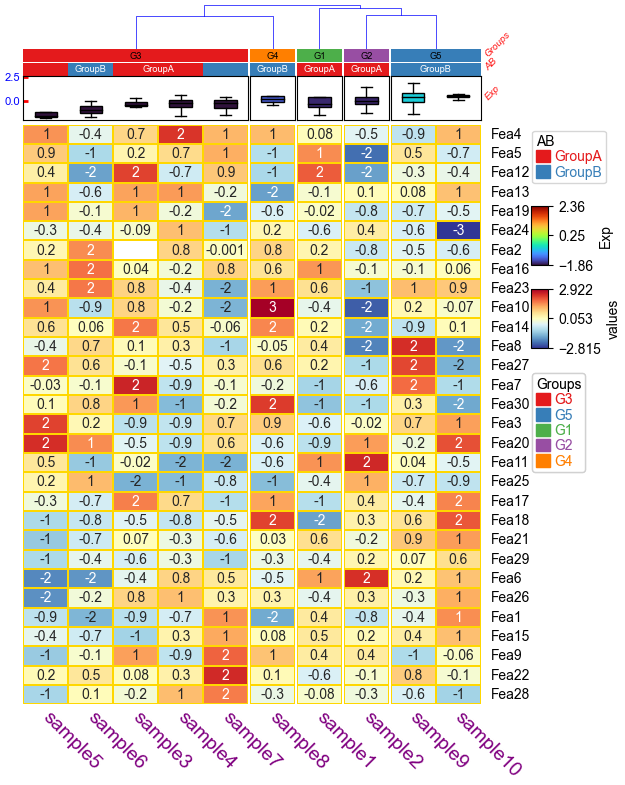

In [4]:
# `label_kws` in `HeatmapAnnotation` control the heatmap annotaiton labels
col_ha = HeatmapAnnotation(
                Groups=anno_simple(df.Groups,add_text=True,text_kws={'color':'black'}),
                AB=anno_simple(df.AB,add_text=True),axis=1,
                Exp=anno_boxplot(df_box, cmap='turbo'),
                verbose=0,label_side='right',
    
                label_kws=dict(visible=True,color='red',rotation=45,fontsize=7,fontstyle='italic',
                              alpha=0.9,verticalalignment='center',horizontalalignment='left'),
                #for more parameters of label_kws, see ax.yaxis.label.properties()
    
                ticklabels_kws=dict(which='major',color='red',labelcolor='blue',left=True,direction='in',
                                   width=2,pad=2,labelsize=8) 
                #for more parameters of ticklabels_kws,see matplotlib.axes.Axes.tick_params,
)

# `xticklabels_kws` and `yticklabels_kws` control the ticklabels for the heatmap.
plt.figure(figsize=(6, 8))
cm = ClusterMapPlotter(data=df_heatmap, top_annotation=col_ha,
                       col_split=df.Groups, col_split_order="cluster_between_groups",
                       col_split_gap=0.5,col_cluster=True,
                       row_cluster=True,col_dendrogram=True,
                       label='values',show_rownames=True,show_colnames=True,
                       tree_kws={'colors':'blue'},verbose=0,legend_gap=7,
                       annot=True,fmt='.1g',linewidths=0.05,linecolor='gold',cmap='RdYlBu_r',
                       
                       xticklabels_kws=dict(labelrotation=-45,labelcolor='purple',labelsize=14),
                       #more parameters for [x/y]_ticklabels_kws, see: matplotlib.axes.Axes.tick_params or ?ax.tick_params
                      )
plt.show()

## `xlabel_kws` and `ylabel_kws`: Modifying `xlabel` and `ylabel`
xlabel_kws: <br>
```python
alpha,color,fontfamily,fontname,fontproperties,fontsize,fontstyle,fontweight,label,rasterized,
rotation,rotation_mode(default,anchor),visible, zorder,verticalalignment,horizontalalignment
```
for more parameters of [x/y]_label_kws, see: 
```python
ax.xaxis.label.properties() or matplotlib.axis.XAxis.label.properties()
```

xlabel_bbox_kws:
```python
alpha,clip_box, clip_on,edgecolor,facecolor,fill,height,in_layout,label,linestyle
linewidth,rasterized,visible,width
```
See ax.xaxis.label.get_bbox_patch().properties() for more information

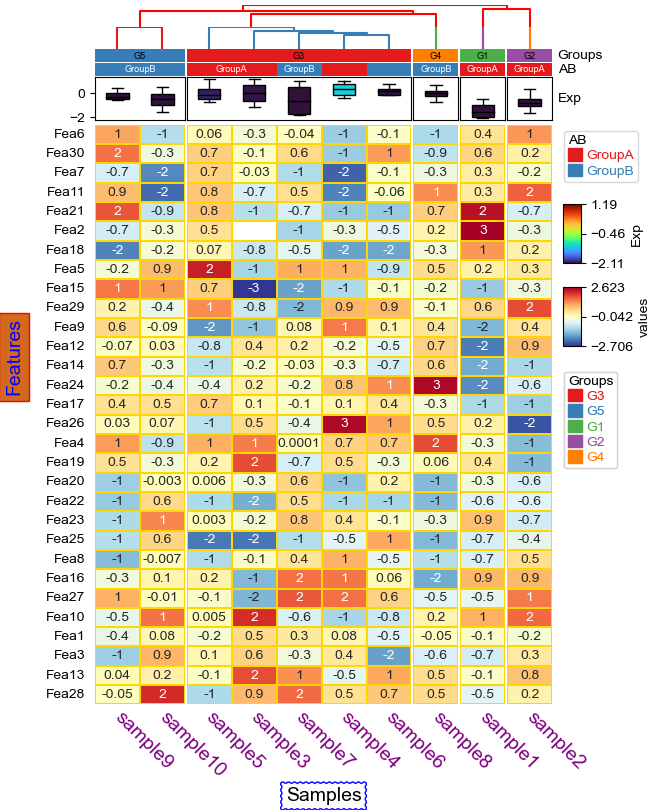

In [5]:
# `label_kws` in `HeatmapAnnotation` control the heatmap annotaiton labels
# `tree_kws` control the line in the dendrogram tree.
col_ha = HeatmapAnnotation(
                Groups=anno_simple(df.Groups,add_text=True,text_kws={'color':'black'}),
                AB=anno_simple(df.AB,add_text=True),axis=1,
                Exp=anno_boxplot(df_box, cmap='turbo'),
                verbose=0,label_side='right'
)

# `xticklabels_kws` and `yticklabels_kws` control the ticklabels for the heatmap.
plt.figure(figsize=(6, 8))
cm = ClusterMapPlotter(data=df_heatmap, top_annotation=col_ha,
                       col_split=df.Groups, #col_split_order="cluster_between_groups",
                       col_split_gap=0.5,col_cluster=True,
                       row_cluster=True,col_dendrogram=True,
                       label='values',show_rownames=True,show_colnames=True,
                       row_names_side='left',
                       tree_kws=dict(colors='red',col_cmap='Set1',linewidth=1.5),verbose=0,legend_gap=7,
                       annot=True,fmt='.1g',linewidths=0.05,linecolor='gold',cmap='RdYlBu_r',
                       xticklabels_kws=dict(labelrotation=-45,labelcolor='purple',labelsize=14),
                       #more parameters for [x/y]_ticklabels_kws, see: matplotlib.axes.Axes.tick_params or ?ax.tick_params
                       xlabel='Samples',ylabel="Features",
                       xlabel_kws=dict(color='black',fontsize=14),
                       ylabel_kws=dict(color='blue',fontsize=14,labelpad=45), #increace labelpad manually using labelpad (points)
                       xlabel_bbox_kws=dict(fill=False,edgecolor='blue',boxstyle='roundtooth'),
                       ylabel_bbox_kws=dict(facecolor='chocolate',edgecolor='red'),
                      )
plt.show()

## Control gap & pad in heatmap

In [6]:
#Generate example dataset (random)
df = pd.DataFrame(['GroupA'] * 5 + ['GroupB'] * 5, columns=['AB'])
df['CD'] = ['C'] * 3 + ['D'] * 3 + ['G'] * 4
df['EF'] = ['E'] * 6 + ['F'] * 2 + ['H'] * 2
df['F'] = np.random.normal(0, 1, 10)
df.index = ['sample' + str(i) for i in range(1, df.shape[0] + 1)]
df_box = pd.DataFrame(np.random.randn(10, 4), columns=['Gene' + str(i) for i in range(1, 5)])
df_box.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['TMB1', 'TMB2'])
df_bar.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_scatter = pd.DataFrame(np.random.uniform(0, 10, 10), columns=['Scatter'])
df_scatter.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_heatmap = pd.DataFrame(np.random.randn(30, 10), columns=['sample' + str(i) for i in range(1, 11)])
df_heatmap.index = ["Fea" + str(i) for i in range(1, df_heatmap.shape[0] + 1)]
df_heatmap.iloc[1, 2] = np.nan

In [7]:
#Annotate the rows with average > 0.3
df_rows = df_heatmap.apply(lambda x:x.name if x.sample4 > 0.5 else None,axis=1)
df_rows=df_rows.to_frame(name='Selected')
df_rows['XY']=df_rows.index.to_series().apply(lambda x:'A' if int(x.replace('Fea',''))>=15 else 'B')

row_ha = HeatmapAnnotation(
            S4=anno_simple(df_heatmap.sample4.apply(lambda x:round(x,2)),
                       height=10,#add_text=True,
                       text_kws={'rotation':0,'fontsize':10,'color':'black'}),
            Test=anno_barplot(df_heatmap.sample4.apply(lambda x:round(x,2)),
                        height=18,cmap='rainbow'),
            selected=anno_label(df_rows,colors='red',relpos=(0,0.5)),
            axis=0,verbose=0,wgap=4,label_kws={'rotation':0,'horizontalalignment':'left',
                                        'verticalalignment':'bottom'})

col_ha = HeatmapAnnotation(
            label=anno_label(df.AB, merge=True,rotation=15),
            AB=anno_simple(df.AB,add_text=True,height=5),axis=1,
            CD=anno_simple(df.CD,add_text=True,height=5),
            EF=anno_simple(df.EF,add_text=True,height=5,
                            legend_kws={'frameon':False}),
            Exp=anno_boxplot(df_box, cmap='turbo',grid=True),
            verbose=0,hgap=2) #verbose=0 will turn off the log.

# plt.figure(figsize=(6, 8))
cm = ClusterMapPlotter(
            data=df_heatmap, top_annotation=col_ha,right_annotation=row_ha,
            col_split=df.AB,
            row_split=df_rows.XY, 
            col_split_gap=3.5,row_split_gap=2.5,
            col_cluster=True,row_cluster=True,
            label='values',row_dendrogram=False,
            show_rownames=True,show_colnames=True,
            verbose=0,legend_gap=5,legend_hpad=10,legend_vpad=5,
            #annot=True,fmt='.1g',linewidths=0.05,linecolor='gold',
            cmap='RdYlBu_r',
            xticklabels_kws={'labelrotation':-45,'labelcolor':'blue'},
            yticklabels_kws=dict(labelcolor='red',pad=20),
            subplot_gap=8,
            xlabel='Samples',xlabel_kws=dict(color='white',fontsize=14,labelpad=25),
            xlabel_bbox_kws=dict(facecolor='black'),ylabel_bbox_kws=dict(facecolor='green'),
            ylabel='Features',ylabel_kws=dict(color='black',fontsize=14,labelpad=45),plot=False
) 
# plt.show()

<img src="https://raw.githubusercontent.com/DingWB/PyComplexHeatmap/main/docs/images/gallery1.png" width="800"/>

### `hgap` and `wgap` for `HeatmapAnnotation`
control the gap between two rows/columns of column annotations (axis=1)  or row annotations (axis=0), unit is mm

```
plt.figure(figsize=(4, 8))
col_ha = HeatmapAnnotation(
            label=anno_label(df.AB, merge=True,rotation=15),
            AB=anno_simple(df.AB,add_text=True), 
            Exp=anno_boxplot(df_box, cmap='turbo'),
            Scatter=anno_scatterplot(df_scatter,legend=True),
            Line=anno_lineplot(df_bar2),
            TMB_bar=anno_barplot(df_bar,legend=True,cmap='Set1'),
            legend=True,axis=1,
            hgap=4) #hgap controls the gap between two rows of column annotation (axis=1), if axis=0, please use wgap
plt.show()
```

See: https://dingwb.github.io/PyComplexHeatmap/build/html/notebooks/advanced_usage.html#Only-plot-the-annotations

### `subplot_gap`
controls the gap between main heatmap and column or row annotations

```
plt.figure(figsize=(6, 8))
cm = ClusterMapPlotter(
            data=,...
            subplot_gap=8)
plt.show()
```

See example: https://dingwb.github.io/PyComplexHeatmap/build/html/notebooks/advanced_usage.html#Add-annotations-on-the-top-of-heatmap-cells

### `row_split_gap` and `col_split_gap`
controls the gap between row_split and col_split

## How to remove arrow in anno_label

In [8]:
label=anno_label(df.AB, merge=True,rotation=10,
             arrowprops = dict(visible=False,)
            ), #visible in arrowprops can control whether to show the arrow
# In addition to visible, there are lots of other parameters, please see matplotlib.patches.FancyArrowPatch for more information